In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from word2number import w2n
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data=pd.read_excel('C:\\Users\\KAILASNATH\\Documents\\project 1 machine learning.xlsx')
pd.pandas.set_option('display.max_rows',None)

In [3]:
data

,player name,country,position,golden ball winner,golden boot winner,goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country,expected goals
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry kane,england,forward,zero,one,52.0,6.0,12.0,5.70,Good,5.0,5.0
2,phil foden,england,forward,zero,zero,19.0,0.0,8.0,3.66,Good,5.0,3.0
3,raheem sterling,england,forward,zero,zero,19.0,0.0,3.0,4.00,Average,5.0,2.0
4,Marcus rashford,england,forward,zero,zero,15.0,0.0,4.0,5.47,Average,5.0,4.0
5,bukayo saka,england,forward,zero,zero,7.0,0.0,4.0,4.30,Good,5.0,3.0
6,jack grealish,england,forward,zero,zero,2.0,0.0,1.0,1.22,Poor,5.0,0.0
7,callum wilson,england,forward,zero,zero,6.0,0.0,3.0,2.21,Poor,5.0,2.0
8,declan rice,england,midfielder,zero,zero,2.0,0.0,1.0,1.24,Average,5.0,0.0
9,jude bellingham,england,midfielder,zero,zero,3.0,0.0,3.0,3.55,Good,5.0,1.0


# understanding data

In [4]:
data.shape

(719, 12)

In [5]:
data.head()

,player name,country,position,golden ball winner,golden boot winner,goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country,expected goals
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry kane,england,forward,zero,one,52.0,6.0,12.0,5.70,Good,5.0,5.0
2,phil foden,england,forward,zero,zero,19.0,0.0,8.0,3.66,Good,5.0,3.0
3,raheem sterling,england,forward,zero,zero,19.0,0.0,3.0,4.00,Average,5.0,2.0
4,Marcus rashford,england,forward,zero,zero,15.0,0.0,4.0,5.47,Average,5.0,4.0


In [6]:
data.tail()

,player name,country,position,golden ball winner,golden boot winner,goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country,expected goals
714,facundo pellistri,Uruguay,midfielder,zero,zero,16.0,0.0,0.0,0.88,Average,16.0,0.0
715,federico valverde,Uruguay,midfielder,zero,zero,19.0,0.0,4.0,1.76,Good,16.0,1.0
716,Giorgian de Arrascaeta,Uruguay,midfielder,zero,zero,23.0,0.0,3.0,1.98,Good,16.0,2.0
717,rodrigo bentacur,Uruguay,midfielder,zero,zero,17.0,0.0,1.0,0.98,Average,16.0,0.0
718,lucas torreira,Uruguay,midfielder,zero,zero,5.0,0.0,0.0,0.69,Good,16.0,0.0


In [7]:
data.describe()

,goals for country,goals in previous worldcups,total goals in current league,expected xg,fifa ranking of country,expected goals
count,718.000000,718.000000,718.000000,717.000000,718.000000,718.000000
mean,7.377437,0.075209,1.221448,0.985244,21.984680,0.306407
std,11.570939,0.405573,1.986632,0.978996,16.366395,0.785672
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.540000,9.000000,0.000000
50%,3.000000,0.000000,0.000000,0.780000,18.000000,0.000000
75%,10.000000,0.000000,2.000000,1.030000,30.000000,0.000000
max,118.000000,6.000000,18.000000,9.120000,60.000000,9.000000


In [8]:
data.columns

Index(['player name', 'country', 'position', 'golden ball winner',
       'golden boot winner', 'goals for country',
       'goals in previous worldcups', 'total goals in current league',
       'expected xg', 'chances in starting eleven', 'fifa ranking of country',
       'expected goals'],
      dtype='object')

In [9]:
data.nunique()

player name                      718
country                           32
position                           3
golden ball winner                 3
golden boot winner                 2
goals for country                 49
goals in previous worldcups        6
total goals in current league     17
expected xg                      182
chances in starting eleven         3
fifa ranking of country           30
expected goals                     8
dtype: int64

In [10]:
data['position'].unique()

array([nan, 'forward', 'midfielder', 'defender'], dtype=object)

In [11]:
data['country'].unique()

array([nan, 'england', 'germany', 'senegal', 'morocco', 'netherlands',
       'argentina', 'brazil', 'japan', 'spain', 'costarica', 'australia',
       'france', 'croatia', 'south korea', 'usa', 'wales', 'iran',
       'mexico', 'poland', 'saudi Arabia', 'denmark', 'Tunisia',
       'belgium', 'canada', 'cameroon', 'serbia', 'switzerland', 'ghana',
       'portugal', 'ecuador', 'qatar', 'Uruguay'], dtype=object)

Through this found out the target as expected goals and features as goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country.

# Data cleaning

Removing Null Values

In [12]:
data.isna().sum()

player name                      1
country                          1
position                         1
golden ball winner               2
golden boot winner               3
goals for country                1
goals in previous worldcups      1
total goals in current league    1
expected xg                      2
chances in starting eleven       1
fifa ranking of country          1
expected goals                   1
dtype: int64

In [13]:
data=data.drop([0],axis=0)

In [14]:
data

,player name,country,position,golden ball winner,golden boot winner,goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country,expected goals
1,Harry kane,england,forward,zero,one,52.0,6.0,12.0,5.70,Good,5.0,5.0
2,phil foden,england,forward,zero,zero,19.0,0.0,8.0,3.66,Good,5.0,3.0
3,raheem sterling,england,forward,zero,zero,19.0,0.0,3.0,4.00,Average,5.0,2.0
4,Marcus rashford,england,forward,zero,zero,15.0,0.0,4.0,5.47,Average,5.0,4.0
5,bukayo saka,england,forward,zero,zero,7.0,0.0,4.0,4.30,Good,5.0,3.0
6,jack grealish,england,forward,zero,zero,2.0,0.0,1.0,1.22,Poor,5.0,0.0
7,callum wilson,england,forward,zero,zero,6.0,0.0,3.0,2.21,Poor,5.0,2.0
8,declan rice,england,midfielder,zero,zero,2.0,0.0,1.0,1.24,Average,5.0,0.0
9,jude bellingham,england,midfielder,zero,zero,3.0,0.0,3.0,3.55,Good,5.0,1.0
10,jordan henderson,england,midfielder,zero,NaN,4.0,0.0,1.0,0.99,Good,5.0,1.0


In [15]:
data['position'].unique()

array(['forward', 'midfielder', 'defender'], dtype=object)

In [16]:
data['position'].value_counts()

defender      275
midfielder    250
forward       193
Name: position, dtype: int64

Removing the rest of nan values.

In [30]:
data.isna().sum()

player name                      0
country                          0
position                         0
golden ball winner               1
golden boot winner               2
goals for country                0
goals in previous worldcups      0
total goals in current league    0
expected xg                      0
chances in starting eleven       0
fifa ranking of country          0
expected goals                   0
dtype: int64

In [40]:
data_mode=data['golden ball winner'].mode()

In [45]:
data_mode

0    0.0
Name: golden ball winner, dtype: float64

In [49]:
import math
data_mode=math.floor(data_mode)

In [50]:
data_mode

0

In [51]:
data['golden ball winner']=data['golden ball winner'].fillna(data_mode)

In [57]:
data_mode1=data['golden boot winner'].mode()

In [58]:
data_mode1

0    0.0
Name: golden boot winner, dtype: float64

In [59]:
import math
data_mode1=math.floor(data_mode1)

In [60]:
data_mode1

0

In [61]:
data['golden boot winner']=data['golden boot winner'].fillna(data_mode1)

In [62]:
data.isna().sum()

player name                      0
country                          0
position                         0
golden ball winner               0
golden boot winner               0
goals for country                0
goals in previous worldcups      0
total goals in current league    0
expected xg                      0
chances in starting eleven       0
fifa ranking of country          0
expected goals                   0
dtype: int64

In [18]:

data['golden ball winner']=data['golden ball winner'].replace({'zero':0})
data['golden ball winner']=data['golden ball winner'].replace({'one':1})
data['golden ball winner']=data['golden ball winner'].replace({'two':2})
data['golden boot winner']=data['golden boot winner'].replace({'zero':0})
data['golden boot winner']=data['golden boot winner'].replace({'one':1})
data['golden boot winner']=data['golden boot winner'].replace({'two':2})

changed the numerical word to numbers

In [63]:
data.head()

,player name,country,position,golden ball winner,golden boot winner,goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country,expected goals
1,99,12,1,0.0,1.0,52.0,6.0,12.0,174,1,5.0,5.0
2,610,12,1,0.0,0.0,19.0,0.0,8.0,163,1,5.0,3.0
3,613,12,1,0.0,0.0,19.0,0.0,3.0,164,0,5.0,2.0
4,129,12,1,0.0,0.0,15.0,0.0,4.0,173,0,5.0,4.0
5,281,12,1,0.0,0.0,7.0,0.0,4.0,168,1,5.0,3.0


label encoding of text values to improve the score.


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
label_encoder=LabelEncoder()

In [66]:
data['position']=label_encoder.fit_transform(data['position'])
data['country']=label_encoder.fit_transform(data['country'])
data['player name']=label_encoder.fit_transform(data['player name'])
data['expected xg']=label_encoder.fit_transform(data['expected xg'])
data['chances in starting eleven']=label_encoder.fit_transform(data['chances in starting eleven'])

In [67]:
data.head(10)

,player name,country,position,golden ball winner,golden boot winner,goals for country,goals in previous worldcups,total goals in current league,expected xg,chances in starting eleven,fifa ranking of country,expected goals
1,99,12,1,0.0,1.0,52.0,6.0,12.0,174,1,5.0,5.0
2,610,12,1,0.0,0.0,19.0,0.0,8.0,163,1,5.0,3.0
3,613,12,1,0.0,0.0,19.0,0.0,3.0,164,0,5.0,2.0
4,129,12,1,0.0,0.0,15.0,0.0,4.0,173,0,5.0,4.0
5,281,12,1,0.0,0.0,7.0,0.0,4.0,168,1,5.0,3.0
6,407,12,1,0.0,0.0,2.0,0.0,1.0,107,2,5.0,0.0
7,282,12,1,0.0,0.0,6.0,0.0,3.0,141,2,5.0,2.0
8,329,12,2,0.0,0.0,2.0,0.0,1.0,109,0,5.0,0.0
9,467,12,2,0.0,0.0,3.0,0.0,3.0,162,1,5.0,1.0
10,450,12,2,0.0,0.0,4.0,0.0,1.0,88,1,5.0,1.0


In [68]:
x=data.drop('expected goals',axis=1)
y=data['expected goals']

# Hyperparameter Tuning to select top algorithms.

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=14)

Hyperparameter tuning is performed to find the best algorithm for the particular datasets.

In [70]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [71]:
model_params={'svm':{'model':SVC(gamma='auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}},
             'random_forest':{'model':RandomForestRegressor(),'params':{'n_estimators':[10,15,20]}},
             'logistic_regression':{'model':LogisticRegression(),'params':{'C':[10,15,20]}}}

In [74]:
scores=[]
models=['svm','random_forest','logistic_regression']
for model_name in models: #model_name='svm'
    mp=model_params[model_name]
    #mp={'model':SVC(gamma='auto'),'params':{'C':[1,10,20],'kernel':['rbf','linear']}}
    gds=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=True)
    gds.fit(x,y)
    scores.append ({'model':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})

In [75]:
scores

[{'model': 'svm',
  'best_score': 0.8593531468531468,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.5763417047301823,
  'best_params': {'n_estimators': 20}},
 {'model': 'logistic_regression',
  'best_score': 0.7645493395493397,
  'best_params': {'C': 10}}]

through hyperparameter tuning found the best algorithm to be svm(support vector machines)

In [76]:

svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.875

good score of almost 87.5

# visualization through decision regions

In [ ]:
y=y.values

In [97]:
y.astype(int)

array([5, 3, 2, 4, 3, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 4, 0, 4, 0, 1, 1, 1, 2, 1, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 3, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 8, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 9, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1,

In [99]:

y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [95]:
print(type(y))

<class 'numpy.ndarray'>


In [87]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [88]:
pca=PCA(n_components=2)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [101]:
import matplotlib.pyplot as plt 

0.8333333333333334

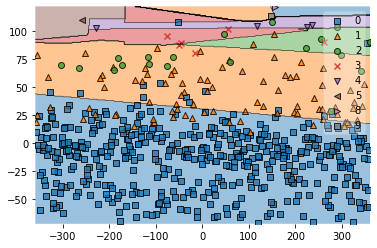

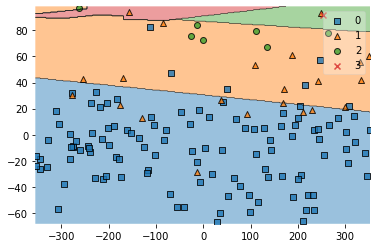

In [102]:
svm_pca=SVC(kernel='linear')
svm_pca.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,clf=svm_pca)
plt.figure()
plot_decision_regions(x_test_pca,y_test,clf=svm_pca)
svm_pca.score(x_test_pca,y_test)